## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
data = pd.read_csv("EastWestAirlines.csv")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## Normalize the data

In [2]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
data_norm = pd.DataFrame(MM.fit_transform(data.iloc[:, 1:]))
data_norm.columns = list(data.iloc[:, 1:])

In [3]:
data_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


## Finding optimal number of clusters

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

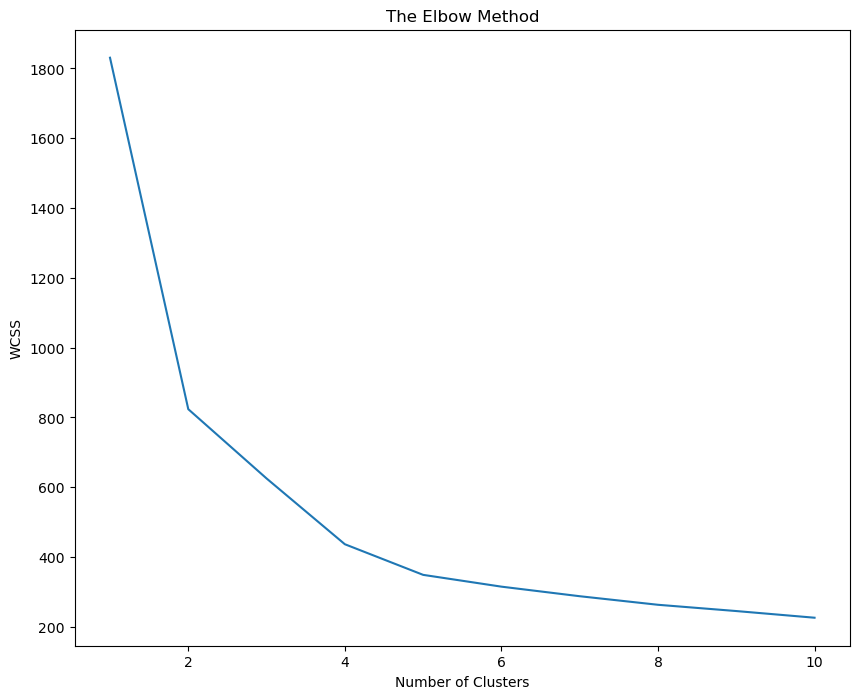

In [4]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(data_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In the elbow graph at the point K=5 the variance is almost coming to zero. So 5 number of clusters can be chosen for this.

## Fitting the model and making predictions

In [5]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(data_norm)  

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
y_kmeans
#clf.cluster_centers_
clf.labels_ 

array([4, 4, 4, ..., 2, 3, 3])

In [7]:
y_kmeans 

array([4, 4, 4, ..., 2, 3, 3])

In [8]:
clf.cluster_centers_ 

array([[ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -3.88578059e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
         7.17842978e-02,  6.90692719e-03,  1.13902296e-02,
         2.39980966e-01, -4.44089210e-16],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
  

In [9]:
clf.inertia_

348.94332172541374

In [10]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
data['clust']=md # creating a  new column and assigning it to new column 
data 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


In [11]:
data.iloc[:,1:].groupby(data.clust).mean()   

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0,0.0
1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,1.0
2,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0,2.0
3,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0,3.0
4,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0,4.0


In [12]:
clust1 = data[(data.clust==1)]
clust1  

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,1
29,30,19221,0,1,1,1,4655,8,500,1,7896,1,1
36,37,23193,0,1,1,1,650,4,550,3,7861,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,4001,10071,0,2,1,1,27701,16,0,0,1421,1,1
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,1
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,1
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1


In [13]:
clust0 = data[(data.clust==0)]
clust0   

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0
30,31,177926,0,3,1,1,20797,13,0,0,7886,0,0
32,33,276571,0,4,1,1,42044,23,0,0,7872,0,0
44,45,121260,0,3,1,1,18493,18,0,0,7808,0,0
56,57,75971,0,4,1,1,34339,14,0,0,6869,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,3989,91605,0,4,1,1,37840,18,0,0,1444,0,0
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,0
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,0
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,0


In [14]:
clust3 = data[(data.clust==3)]
clust3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
1129,1141,1625,0,1,1,1,1375,4,0,0,1547,0,3
1431,1445,44665,0,1,1,1,333,2,333,2,3601,0,3
1549,1564,65021,0,2,1,1,10369,12,0,0,3547,0,3
1552,1567,6341,0,1,1,1,3658,12,0,0,3706,0,3
1553,1568,3641,0,1,1,1,1164,3,0,0,3603,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,3
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,3
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


In [15]:
clust4 = data[(data.clust==4)]
clust4

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
5,6,16420,0,1,1,1,0,0,0,0,6942,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,2314,24277,0,2,1,1,5330,5,0,0,3796,0,4
2299,2317,27904,0,2,1,1,6622,17,0,0,3793,0,4
2300,2318,128620,0,2,1,1,7747,12,0,0,3789,0,4
2302,2320,27135,0,1,1,1,4908,11,0,0,3783,0,4


In [16]:
clust2 = data[(data.clust==2)]
clust2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,2
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,2
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,2
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931,3954,49519,0,3,1,1,25762,18,0,0,1522,1,2
3954,3977,33972,0,3,1,1,21029,29,0,0,1467,1,2
3973,3996,72297,0,3,1,1,16241,16,0,0,1587,1,2
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,2


In [17]:
plt.style.use(['classic']) 
print(plt.style.available) 

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using KMeans')

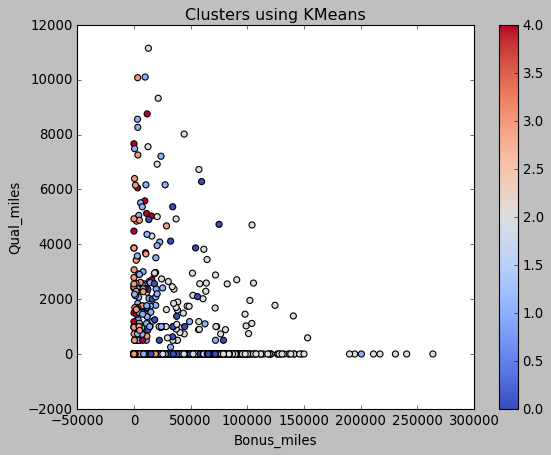

In [18]:
data.plot(x="Bonus_miles",y ="Qual_miles",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

## Repeating the above process with Standardized data

## Standardize the data

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_ss = pd.DataFrame(scaler.fit_transform(data.iloc[:,1:]))
data_ss.columns = list(data.iloc[:,1:])

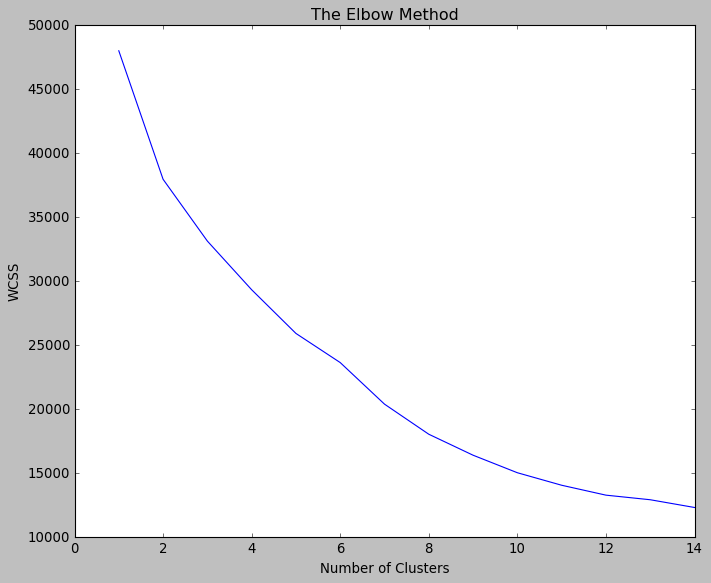

In [20]:
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 15):
    clf = KMeans(n_clusters=i)
    clf.fit(data_ss)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 15), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

According to the graph the optimum K value would be 11. But that many clusters will make things a lot complicated. But still I am proceeding with building the model to verify it.

In [21]:
clf1 = KMeans(n_clusters=11)
y_kmeans = clf1.fit_predict(data_ss)  

In [22]:
clf1.inertia_

14043.46244961672

In [23]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
data['clust1']=md # creating a  new column and assigning it to new column 
data 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,clust1
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4,7
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4,7
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4,7
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4,7
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3,0


In [24]:
data.iloc[:,1:-2].groupby(data.clust1).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust1,,,,,,,,,,,
0,31683.907238,35.415902,1.072375,1.000000,1.000000,2913.420999,5.883792,111.188583,0.373089,1991.476045,0.000000
1,164734.027027,677.567568,2.459459,1.000000,1.000000,43079.270270,38.405405,10088.243243,26.351351,4191.297297,0.945946
2,109722.081494,23.577250,3.570458,1.000000,1.001698,30561.611205,16.886248,160.414261,0.436333,4405.142615,0.000000
3,56963.919708,111.149635,1.222628,1.000000,1.000000,6789.644161,7.892336,314.038321,1.010949,4244.065693,1.000000
4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
5,78863.623881,75.095522,3.859701,1.000000,1.001493,41173.604478,18.714925,296.035821,0.901493,4791.058209,1.000000
6,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
7,48756.669868,32.042017,1.123649,1.000000,1.001200,3252.647059,6.611044,160.363745,0.486194,5584.587035,0.000000
8,117741.037037,5686.148148,2.055556,1.000000,1.000000,19215.203704,12.574074,968.833333,2.888889,3965.555556,0.518519


Text(0.5, 1.0, 'Clusters using KMeans')

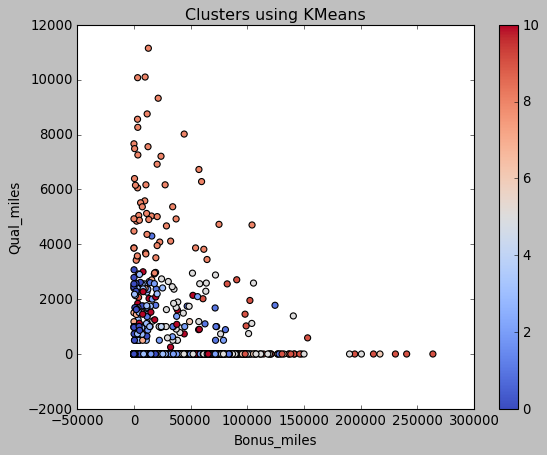

In [25]:
data.plot(x="Bonus_miles",y ="Qual_miles",c=clf1.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

#### Normalization of the data gave some improved results when compared with Standardization. The clustering with the Standardization of the data is not so accurate in making the hierarchies.

#### Also for the number of clusters, we can go with 8 or 4 depending on the precision of the clustering we need. And among the different linkage methods, the 'complete' linkage method gave the best grouped clusters. The 'single' method gave very poorly grouped clusters